### About Dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [36]:
#importing all necessary libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

### Data Extraction

In [3]:
df = pd.read_csv(r'C:\Users\user\Downloads\heart_failure_clinical_records_dataset.csv')

In [4]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
df.shape

(299, 13)

### Data Cleaning

In [6]:
#evaluate missing data.
missing_data = df.isnull()
missing_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#count missing value per column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

age
False    299
Name: age, dtype: int64

anaemia
False    299
Name: anaemia, dtype: int64

creatinine_phosphokinase
False    299
Name: creatinine_phosphokinase, dtype: int64

diabetes
False    299
Name: diabetes, dtype: int64

ejection_fraction
False    299
Name: ejection_fraction, dtype: int64

high_blood_pressure
False    299
Name: high_blood_pressure, dtype: int64

platelets
False    299
Name: platelets, dtype: int64

serum_creatinine
False    299
Name: serum_creatinine, dtype: int64

serum_sodium
False    299
Name: serum_sodium, dtype: int64

sex
False    299
Name: sex, dtype: int64

smoking
False    299
Name: smoking, dtype: int64

time
False    299
Name: time, dtype: int64

DEATH_EVENT
False    299
Name: DEATH_EVENT, dtype: int64



### Explorative Data Analysis

In [8]:
#checking the datatype of each column
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
df.describe(include="all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
df['DEATH_EVENT'].value_counts().to_frame()

,DEATH_EVENT
0,203
1,96


In [13]:
#checking the correllation with the target
df.corr()['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

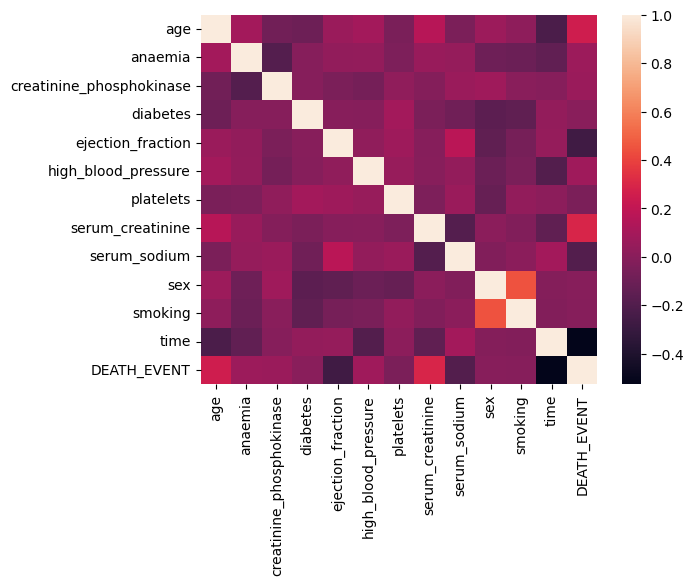

In [15]:
# Heatmap
sns.heatmap(df.corr(), annot=False)
plt.show()

In [21]:
#Featuring the data
X = np.asarray(df[['serum_creatinine', 'age', 'ejection_fraction', 'platelets',"serum_sodium","creatinine_phosphokinase"]])
X[0:5]

array([[1.9000000e+00, 7.5000000e+01, 2.0000000e+01, 2.6500000e+05,
        1.3000000e+02, 5.8200000e+02],
       [1.1000000e+00, 5.5000000e+01, 3.8000000e+01, 2.6335803e+05,
        1.3600000e+02, 7.8610000e+03],
       [1.3000000e+00, 6.5000000e+01, 2.0000000e+01, 1.6200000e+05,
        1.2900000e+02, 1.4600000e+02],
       [1.9000000e+00, 5.0000000e+01, 2.0000000e+01, 2.1000000e+05,
        1.3700000e+02, 1.1100000e+02],
       [2.7000000e+00, 6.5000000e+01, 2.0000000e+01, 3.2700000e+05,
        1.1600000e+02, 1.6000000e+02]])

In [22]:
Y = np.asarray(df['DEATH_EVENT'])
Y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

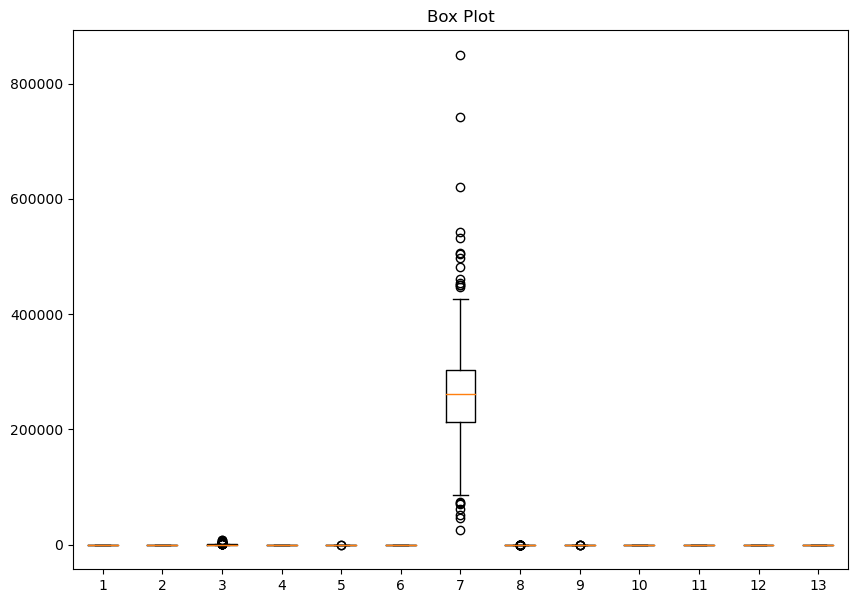

In [20]:
fig = plt.figure(figsize =(10, 7)) 

plt.boxplot(df)

plt.title("Box Plot")

plt.show()

In [25]:
#Creating a new death_rate column  where 1 = Alive and 0 = Died.
def set_name(DEATH_EVENT):
    if DEATH_EVENT == 1:
        return 'Alive'
    else:
        return 'Died'
    
    
df['DEATH_Rate'] = df['DEATH_EVENT'].apply(set_name)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_Rate
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Alive
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Alive
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Alive
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Alive
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,Died
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,Died
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,Died
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,Died


<AxesSubplot:xlabel='DEATH_Rate', ylabel='count'>

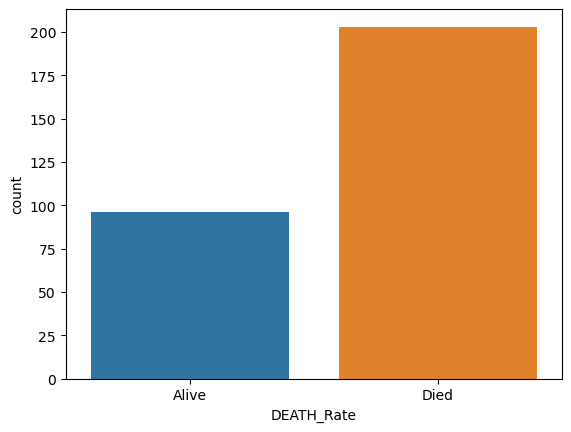

In [26]:
sns.countplot(data = df, x ='DEATH_Rate' ,label ="count")

In [31]:
#Creating a new death_rate column  where 1 = Alive and 0 = Died.
def set_name(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
    
    
df['Gender'] = df['sex'].apply(set_name)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_Rate,Gender
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Alive,Male
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Alive,Male
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Alive,Male
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Alive,Male
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Alive,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,Died,Male
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,Died,Female
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,Died,Female
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,Died,Male


<AxesSubplot:xlabel='Gender', ylabel='count'>

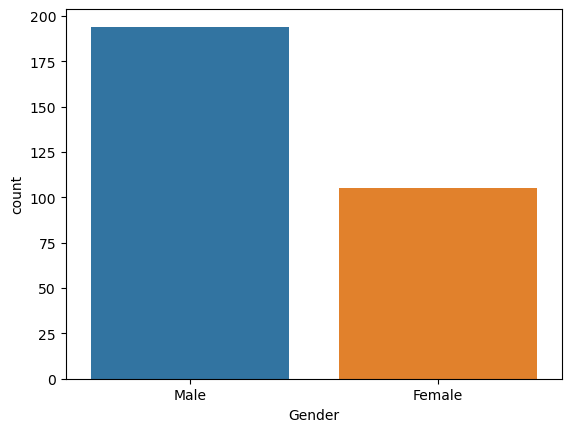

In [32]:
sns.countplot(data = df, x ='Gender' ,label ="count")

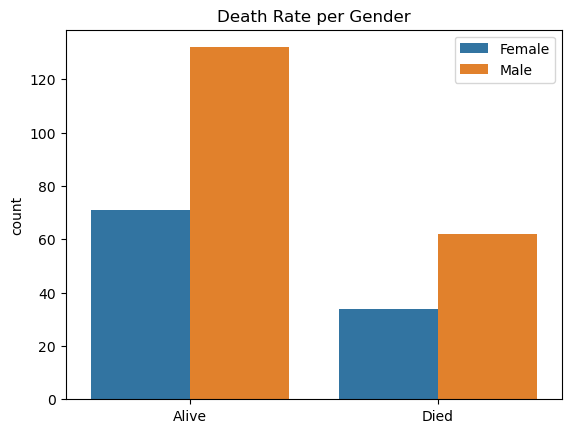

In [33]:
Gender_Death = sns.countplot(x='DEATH_EVENT', data = df, hue='sex')
plt.legend(['Female', 'Male'])
Gender_Death.set_title("Death Rate per Gender")
Gender_Death.set_xticklabels(['Alive', 'Died'])
plt.xlabel("");

C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Platelets distribution')

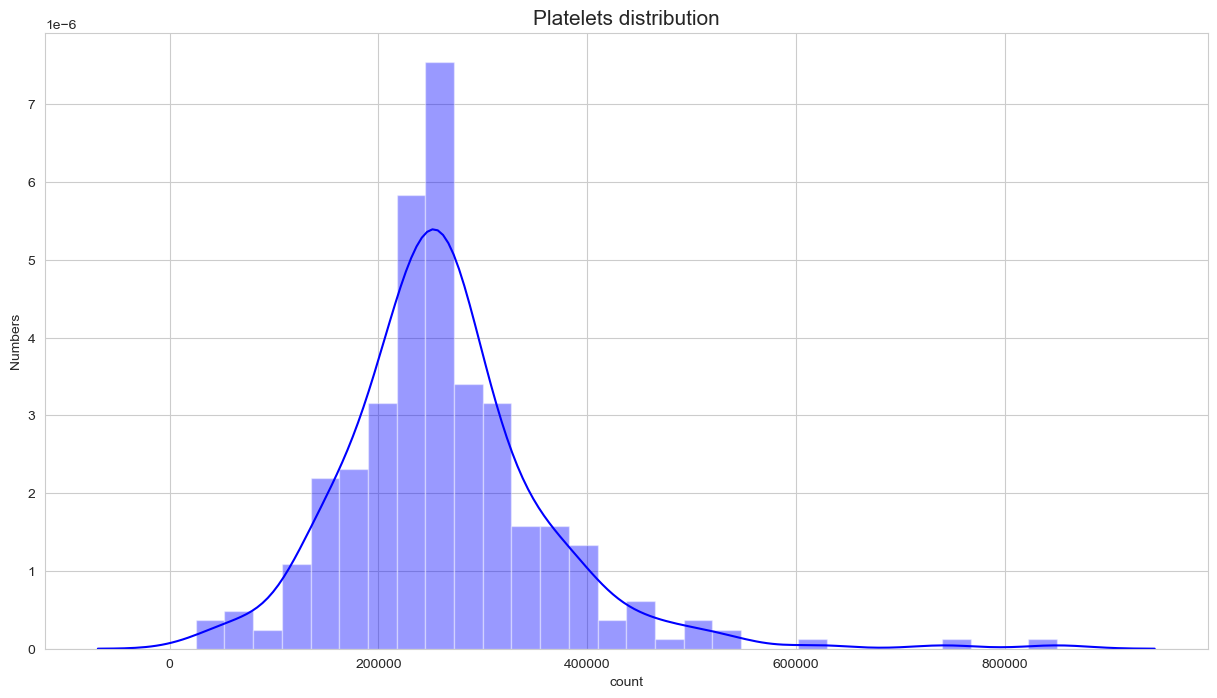

In [37]:
plt.figure(figsize=(15,8))
sns.distplot(df['platelets'], hist=True, bins=30, color='blue')
plt.xlabel('count')
plt.ylabel('Numbers')
plt.title('Platelets distribution', fontsize=15)

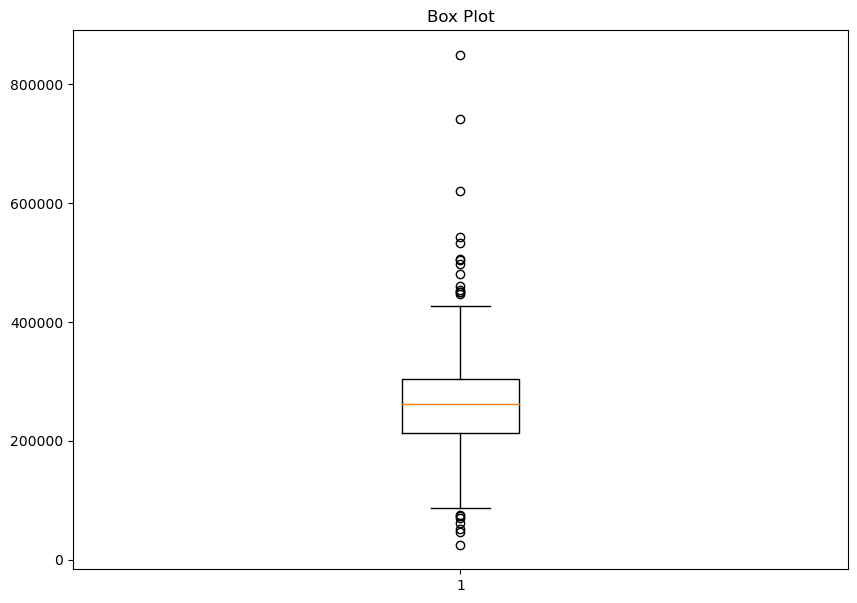

In [34]:
fig = plt.figure(figsize =(10, 7)) 

plt.boxplot(df['platelets'])

plt.title("Box Plot")

plt.show()

In [51]:
df["age"].value_counts().to_frame()

,age
60.000,33
50.000,27
65.000,26
70.000,25
45.000,19
55.000,17
75.000,11
58.000,10
53.000,10
63.000,8


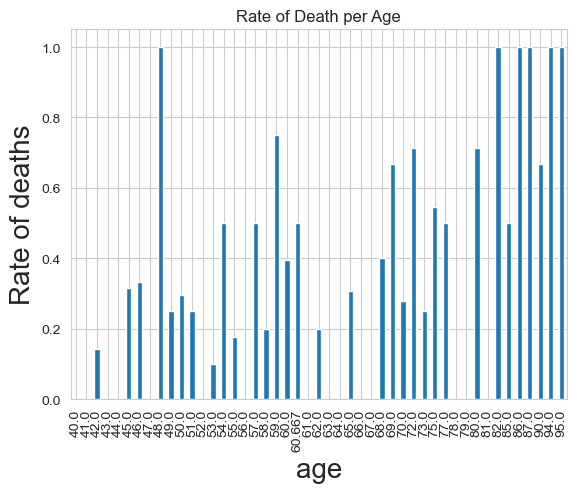

In [53]:
###Let's create a bar chart for the rate of death per age
df.groupby("age").mean()['DEATH_EVENT'].plot(kind='bar')
plt.xlabel("age",fontsize=20)
plt.ylabel("Rate of deaths",fontsize=20)
plt.title('Rate of Death per Age')
plt.show()

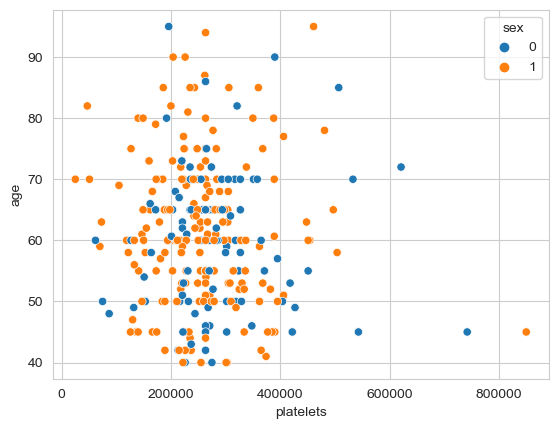

In [58]:
sns.scatterplot(x="platelets", y="age", hue="sex", data=df)

# Show plot
plt.show()

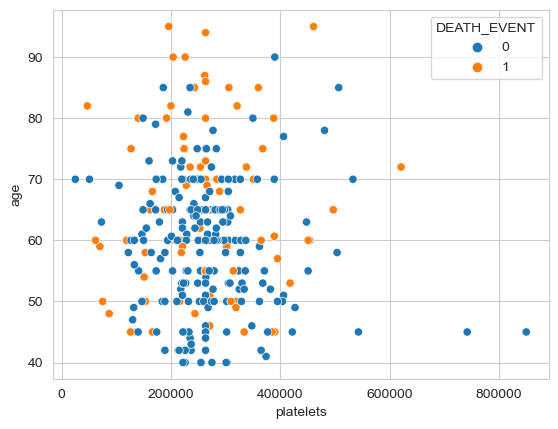

In [59]:
sns.scatterplot(x="platelets", y="age", hue="DEATH_EVENT", data=df)

# Show plot
plt.show()

### TRAINING OF MODEL

In [60]:
#we normalize the dataset:

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 4.90056987e-01,  1.19294523e+00, -1.53055953e+00,
         1.68164843e-02, -1.50403612e+00,  1.65728387e-04],
       [-2.84552352e-01, -4.91279276e-01, -7.07675018e-03,
         7.53566018e-09, -1.41976151e-01,  7.51463953e+00],
       [-9.09000174e-02,  3.50832977e-01, -1.53055953e+00,
        -1.03807313e+00, -1.73104612e+00, -4.49938761e-01],
       [ 4.90056987e-01, -9.12335403e-01, -1.53055953e+00,
        -5.46474088e-01,  8.50338444e-02, -4.86071002e-01],
       [ 1.26466633e+00,  3.50832977e-01, -1.53055953e+00,
         6.51798584e-01, -4.68217606e+00, -4.35485864e-01]])

In [61]:
#we split the dataset into 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (239, 6) (239,)
Test set: (60, 6) (60,)


In [62]:
Y_test[:]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [63]:
Y_train[:]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

### LOGISTIC REGRESSION

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [65]:
##LogisticRegression(C=0.01, solver='liblinear')
##Now we can predict using our test set:

yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluation

In [66]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.45066951, 0.54933049],
       [0.58091126, 0.41908874],
       [0.60402875, 0.39597125],
       [0.57000054, 0.42999946],
       [0.58334456, 0.41665544]])

In [67]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=0)

0.7142857142857143

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, yhat, labels=[1,0]))


[[ 4 14]
 [ 2 40]]


Confusion matrix, without normalization
[[ 4 14]
 [ 2 40]]


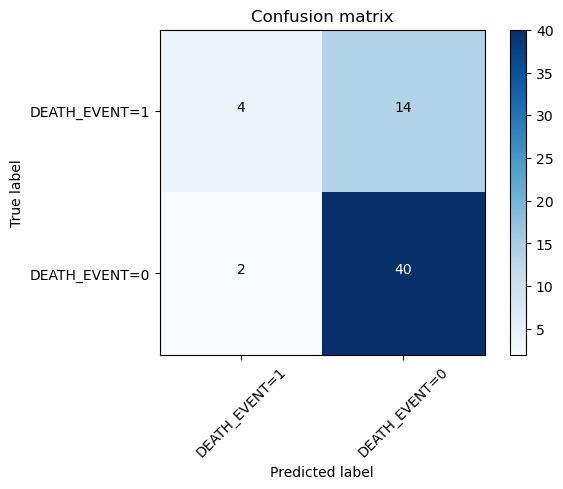

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['DEATH_EVENT=1','DEATH_EVENT=0'],normalize= False,  title='Confusion matrix')

In [69]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        42
           1       0.67      0.22      0.33        18

    accuracy                           0.73        60
   macro avg       0.70      0.59      0.58        60
weighted avg       0.72      0.73      0.68        60



### HYPERPARAMETER TUNING FOR LR

In [70]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

In [71]:
lr=LogisticRegression()

In [72]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)

In [73]:
logreg_cv=logreg_cv.fit(X_train, Y_train)

In [74]:
yhat=logreg_cv.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluation

In [75]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=0)

0.7321428571428571

In [76]:
# Print the tuned parameters and score
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7324275362318841


In [79]:
from sklearn.metrics import accuracy_score

yhat=logreg_cv.predict(X_test)
print("LOGISTIC REGRESSION's Accuracy: ", logreg_cv.score(X_test, Y_test))
print("Accuracy: ", accuracy_score(Y_test, yhat))

LOGISTIC REGRESSION's Accuracy:  0.75
Accuracy:  0.75


In [80]:
def plot_confusion_matrix(Y,Y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(Y, Y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['DEATH_EVENT=1','DEATH_EVENT=0']); ax.yaxis.set_ticklabels(['DEATH_EVENT=1','DEATH_EVENT=0']) 
    plt.show() 

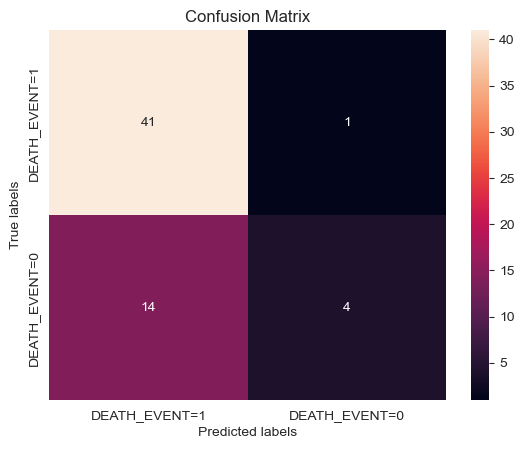

In [81]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [82]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        42
           1       0.80      0.22      0.35        18

    accuracy                           0.75        60
   macro avg       0.77      0.60      0.60        60
weighted avg       0.76      0.75      0.70        60



### SUPPORT_VECTOR_MACHINE

In [83]:
from sklearn import svm
df= svm.SVC(kernel='rbf')
df=df.fit(X_train, Y_train)

In [84]:
yhat = df.predict(X_test)
yhat [:]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
print("DecisionTree's Accuracy: ",df.score(X_test,Y_test))
print("DecisionTree's Accuracy: ", accuracy_score(Y_test, yhat))

DecisionTree's Accuracy:  0.7166666666666667
DecisionTree's Accuracy:  0.7166666666666667


In [88]:
jaccard_score(Y_test, yhat,pos_label=0)

0.6909090909090909

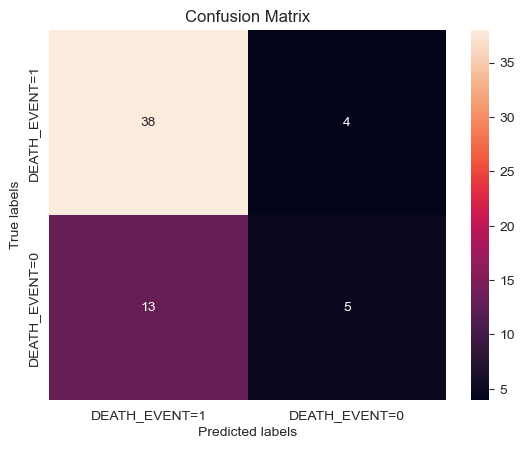

In [89]:
yhat=df.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [100]:
#Another Parameter
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [101]:
yhat = svm.predict(X_test)
yhat [:]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [102]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        42
           1       0.56      0.28      0.37        18

    accuracy                           0.72        60
   macro avg       0.65      0.59      0.59        60
weighted avg       0.69      0.72      0.68        60



### Using More Parameters

In [103]:
parameters = {'kernel':('linear','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [104]:
svm_cv = GridSearchCV(svm, parameters, cv=10)

In [105]:
svm_cv=svm_cv.fit(X_train, Y_train)

In [106]:
yhat=svm_cv.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [107]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.7409420289855073
tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.7409420289855073


In [108]:
svm_cv.score(X_test, Y_test)

0.75

In [109]:
jaccard_score(Y_test, yhat, pos_label=0)

0.7321428571428571

In [110]:
print("best :",tree_cv.best_score_)
print("DecisionTree's Accuracy: ",tree_cv.score(X_test,Y_test))
print("DecisionTree's Accuracy: ", accuracy_score(Y_test, yhat))

NameError: name 'tree_cv' is not defined

In [111]:
'rbf','poly'

('rbf', 'poly')

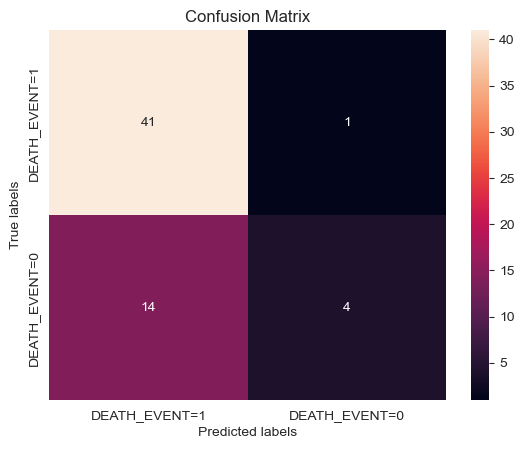

In [112]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### DECISION TREE

In [113]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [114]:
tree_cv = GridSearchCV(tree, parameters, cv=10)

In [115]:
tree_cv=tree_cv.fit(X_train,Y_train)

In [116]:
yhat=tree_cv.predict(X_test)
yhat

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [117]:
print ('Predicted:',yhat [:])
print ('existing.:',Y_test [:])

Predicted: [0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
existing.: [1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1]


In [118]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, yhat))

DecisionTrees's Accuracy:  0.6333333333333333


In [119]:
tree_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto',
                       min_samples_split=5)

In [120]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.7827898550724638


In [121]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=0)

0.6140350877192983

In [122]:
print("DecisionTree's Accuracy: ",tree_cv.score(X_test,Y_test))
print("DecisionTree's Accuracy: ", metrics.accuracy_score(Y_test, yhat))

DecisionTree's Accuracy:  0.6333333333333333
DecisionTree's Accuracy:  0.6333333333333333


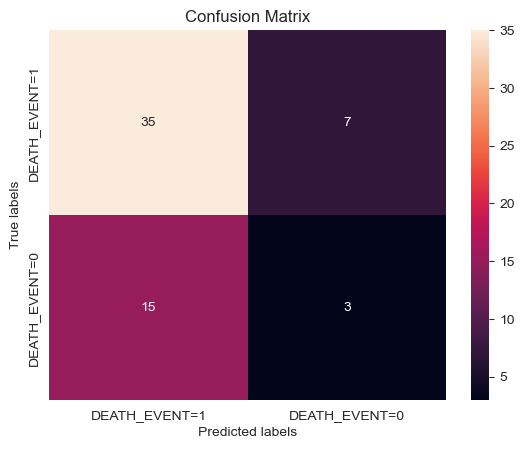

In [123]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### K-NEAREST NIEGHBOUR. KNN

In [124]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [125]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)

In [126]:
knn_cv.fit(X_train,Y_train)

C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [127]:
yhat = knn_cv.predict(X_test)
yhat

C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [131]:
print("best :",tree_cv.best_score_)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

best : 0.7827898550724638
Test set Accuracy:  0.7666666666666667


In [132]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=0)

0.7454545454545455

C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


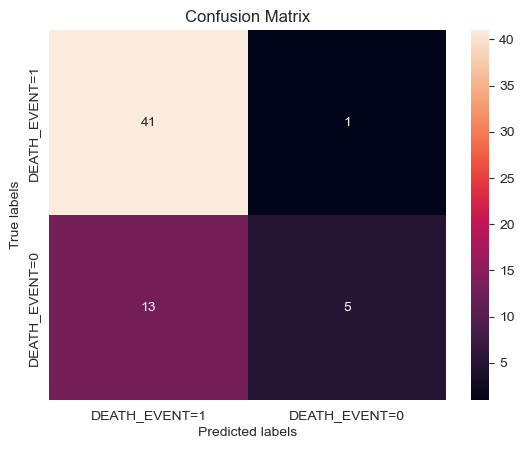

In [133]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [136]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85        42
           1       0.83      0.28      0.42        18

    accuracy                           0.77        60
   macro avg       0.80      0.63      0.64        60
weighted avg       0.78      0.77      0.72        60



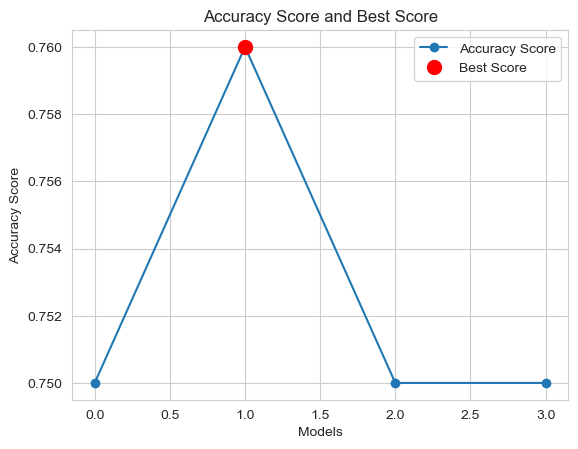

In [137]:
import matplotlib.pyplot as plt

scores = [0.75, 0.76, 0.75, 0.75]
best_score = max(scores)

plt.plot(np.arange(len(scores)), scores, '-o', label='Accuracy Score')
plt.plot(np.argmax(scores), best_score, 'ro', markersize=10, label='Best Score')

plt.title('Accuracy Score and Best Score')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

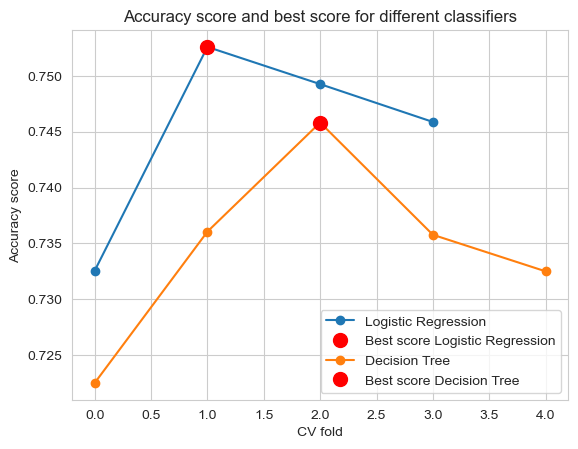

In [138]:
# Create logistic regression, decision tree, and random forest objects and perform grid search
logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg, {"C": [0.1, 1, 10, 100]})
grid_logreg.fit(X, Y)

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, {"max_depth": [1, 2, 3, 4, 5]})
grid_dt.fit(X, Y)


# Plot the accuracy score for all CV folds and the best score for each classifier
scores_logreg = np.array(grid_logreg.cv_results_['mean_test_score'])
best_score_logreg = grid_logreg.best_score_
scores_dt = np.array(grid_dt.cv_results_['mean_test_score'])
best_score_dt = grid_dt.best_score_


plt.plot(np.arange(len(scores_logreg)), scores_logreg, '-o', label='Logistic Regression')
plt.plot(np.argmax(scores_logreg), best_score_logreg, 'ro', markersize=10, label='Best score Logistic Regression')
plt.plot(np.arange(len(scores_dt)), scores_dt, '-o', label='Decision Tree')
plt.plot(np.argmax(scores_dt), best_score_dt, 'ro', markersize=10, label='Best score Decision Tree')


plt.title('Accuracy score and best score for different classifiers')
plt.xlabel('CV fold')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()